In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt 

In [17]:
atac_enrich = pd.read_csv('subclass_markerExpr.csv')

In [18]:
atac_enrich = atac_enrich[atac_enrich.columns[::-1]]

In [19]:
atac_enrich = atac_enrich.rename(columns={'Unnamed: 0': 'featurekey'})

In [20]:
atac_enrich

,L6b,L6 IT Car3,L6 IT,L6 CT,L5/6 NP,L5,L4 IT,L2/3 IT,Vip,Sst Chodl,...,Lamp5 Lhx6,Lamp5,Chandelier,VLMC,OPC,Oligo,Micro/PVM,Endo,Astro,featurekey
0,0.134217,0.115805,0.272894,0.048872,0.055188,0.160034,0.152526,0.219564,0.038985,0.000000,...,0.159017,0.014802,0.018561,0.072322,0.098787,0.005427,0.044811,0.214848,5.107606,AQP4
1,0.044472,0.022420,0.025093,0.000000,0.012910,0.013096,0.013178,0.005202,0.013516,0.261544,...,0.000000,0.000000,0.018045,0.992577,0.038417,0.006986,0.043539,0.668854,5.344326,GJA1
2,0.038203,0.048771,0.033805,0.013225,0.030504,0.037698,0.030349,0.029770,0.206634,0.000000,...,0.023331,0.029052,0.027327,0.666089,0.029086,0.013444,0.225795,7.113762,0.019722,FLT1
3,0.081876,0.000000,0.000729,0.005244,0.000000,0.001979,0.001011,0.001231,0.000000,0.000000,...,0.000000,0.018884,0.000000,0.644394,0.000000,0.000898,0.000000,8.267983,0.022230,CLDN5
4,0.046492,0.022779,0.032043,0.027781,0.093354,0.040057,0.037966,0.020717,0.022442,0.000000,...,0.107633,0.086505,0.065687,0.043177,0.050976,0.013072,5.724475,0.000000,0.025736,APBB1IP
5,0.004906,0.000000,0.003414,0.000000,0.008529,0.003172,0.001064,0.002346,0.005599,0.000000,...,0.000000,0.006259,0.000000,0.096781,0.013983,0.002329,2.183509,0.000000,0.004952,CX3CR1
6,0.134327,0.165093,0.200180,0.096971,0.315657,0.203940,0.134773,0.103665,0.029164,0.814053,...,0.092853,0.115769,0.016288,0.086639,0.027112,4.613994,0.065947,0.000000,0.071930,MOBP
7,0.027128,0.031244,0.022056,0.014351,0.025306,0.029650,0.011783,0.006370,0.018005,0.592835,...,0.048170,0.050342,0.017448,0.037192,0.165935,2.731761,0.027564,0.000000,0.032972,MOG
8,0.052737,0.032081,0.023357,0.039952,0.070178,0.041437,0.023481,0.007111,0.058404,0.265748,...,0.018966,0.040428,0.068434,0.037192,4.914653,2.149786,0.047078,0.000000,0.529334,OLIG1
9,0.013178,0.045465,0.018124,0.024871,0.038492,0.017073,0.011505,0.004751,0.010510,0.235891,...,0.008147,0.013170,0.000000,0.000000,3.323763,0.893650,0.018126,0.000000,0.141791,OLIG2


In [21]:
atac_enrich = atac_enrich.set_index('featurekey')

In [22]:
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors

parameterToColorBy = np.linspace(5, 10, 6, dtype=float)

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
         cmap(np.linspace(minval, maxval, n)))
    return new_cmap

minColor = .8
maxColor = 0
blue = truncate_colormap(plt.get_cmap("Blues_r"), minColor, maxColor)

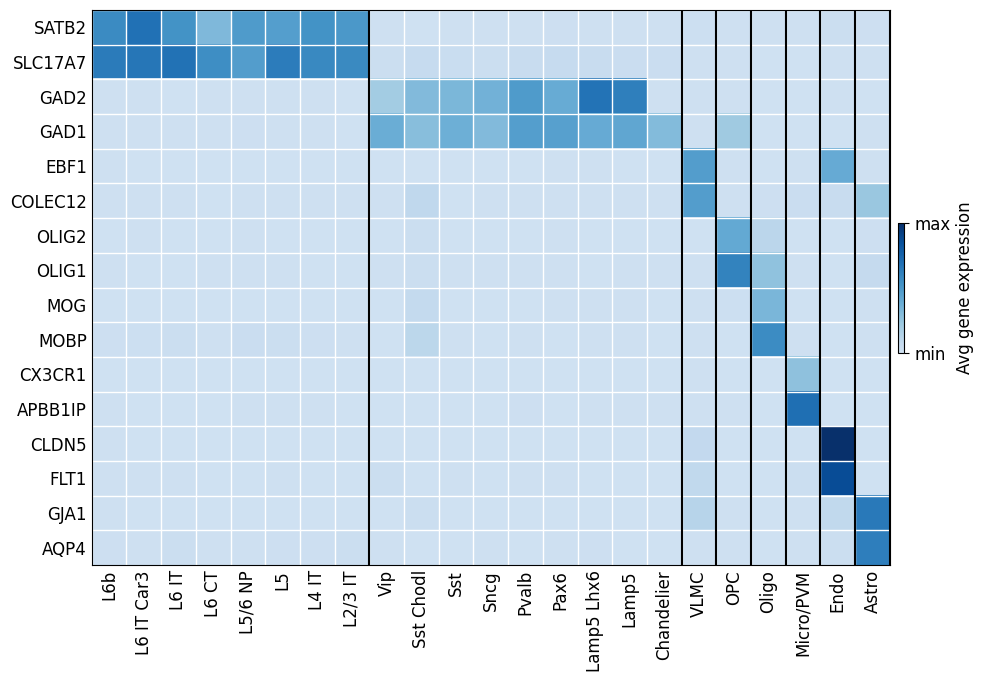

In [24]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.rcParams['font.size'] = '12'
fig, ax = plt.subplots(1,1, figsize=(10,10), sharey=True)

enrich = atac_enrich[::-1]
img = ax.imshow(np.array(enrich),cmap=blue)

x_labels = enrich.columns
y_labels = atac_enrich.index.to_list()[::-1]
ax.set_xticks(np.arange(len(enrich.columns)))
ax.set_xticklabels(x_labels,rotation=90)
ax.set_yticks(np.arange(len(enrich.index)))
ax.set_yticklabels(y_labels)
ax.set_aspect(aspect=1)
ax.set_xticks(np.arange(-0.5, enrich.shape[1]-1),minor=True)
ax.set_yticks(np.arange(-0.5, enrich.shape[0]-1),minor=True)
ax.grid(which='minor', color='white', linewidth=1)
ax.grid(which='major',linewidth=0)
ax.tick_params(axis=u'both', which=u'both',length=0)

cb = fig.colorbar(img,fraction=0.008,pad=0.01,location='right')
cb.ax.set_ylabel('Avg gene expression',fontsize=12)
cb.set_ticks([atac_enrich.min().min(), atac_enrich.max().max()])
cb.ax.set_yticklabels(['min', 'max'])
cb.ax.tick_params(rotation=0)

for g in [8,17,18,19,20,21,22,23]:
    ax.axvline(x=g-0.5,color='k')
        
fig.tight_layout()
plt.savefig('TF_motifs_heatmap.pdf',bbox_inches='tight',dpi=300)